# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: Customer Personality Analysis 
Link to my dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Import the necessary libraries and create your dataframe(s).

In [19]:
#Importing the libraries:
import numpy as np 
import pandas as pd 
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px

#Creating the dataframe:
data = pd.read_csv("marketing_campaign.csv")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [20]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
From the above output, we can conclude the below:
    - There are missing values in the Income field (2016 entries vs 2040).
    - The Dt_Customer field indicated the date the customer joined the database, 
    but it's not parsed as DateTime. 
    - There are some categorical data in the dataframe, based on their data type object. 
    So we will need to encode them to numeric fields. 

SyntaxError: unterminated string literal (detected at line 3) (477240682.py, line 3)

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [21]:
#Finding missing data:
data.isna().sum()

#As we can see, the Income field has 24 missing values. 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
#Filling the null values with median value:

data['Income']=data['Income'].fillna(data['Income'].median())
print(f'NULL values: {data["Income"].isnull().sum()}')


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [22]:
# Identifying the age of all customers:
data['Age'] = datetime.now().year - data['Year_Birth']
data['Age']
# Identifying customers older than 90:
data.query('Age>90')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,3,11,0,123
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,3,11,0,130
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,0,1,0,0,0,3,11,0,124


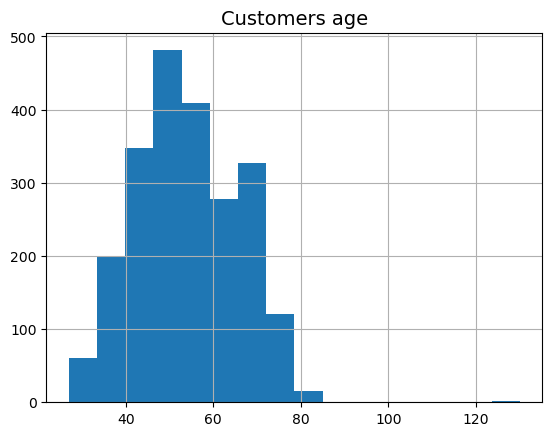

In [23]:
#Finding outliers in the Age field:
data.Age.hist(bins=16)
plt.title('Customers age', fontsize=14)
plt.show()

In [27]:
#Age over 90 is  not very useful for a market campaign, so I will drop them:
ids_to_drop = [7829, 11004, 1150]
data = data[~data['ID'].isin(ids_to_drop)]

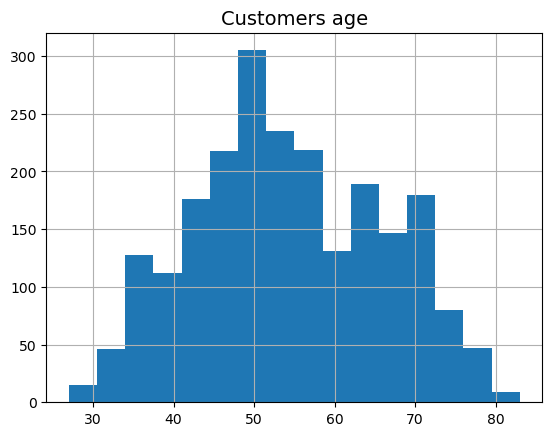

In [28]:
#hecking if the outliers in the Age field are gone:
data.Age.hist(bins=16)
plt.title('Customers age', fontsize=14)
plt.show()

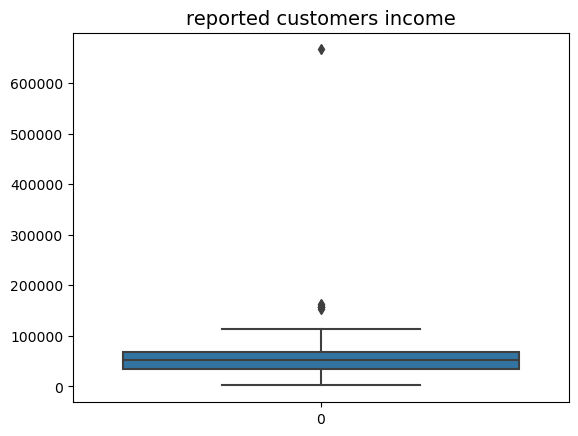

In [24]:
#I'll check for outliers in the Income:
sns.boxplot(data.Income)
plt.title('reported customers income', fontsize=14)
plt.show()

In [25]:
#The very high income (the outlier) is not useful for cluster segmentation, 
#so I will drop it:
data.query('Income>300000')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2233,9432,1977,Graduation,Together,666666.0,1,0,2/6/2013,23,9,...,0,0,0,0,0,0,3,11,0,46


In [33]:
#Dropping the very high income record for better cluster segmentation,
#which is ID # 9432:
ids_to_drop_1 = [9432]
data = data[~data['ID'].isin(ids_to_drop_1)]

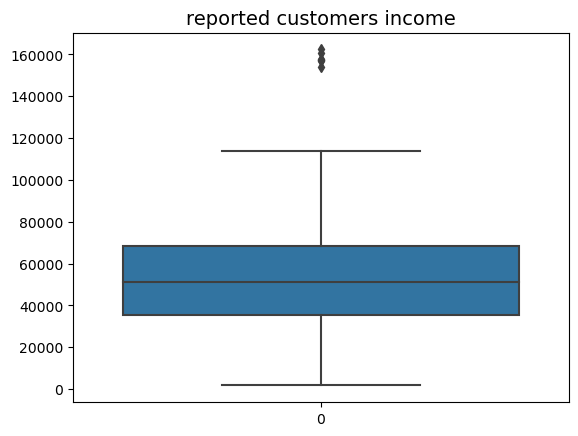

In [34]:
#Checking for outliers in the Income:
sns.boxplot(data.Income)
plt.title('reported customers income', fontsize=14)
plt.show()

#Looks good:

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [29]:
#Checking the column names, datatypes, and the values:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

In [30]:
data.head(100)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7516,1983,Graduation,Married,30096.0,1,0,22-05-2014,30,5,...,0,0,0,0,0,0,3,11,0,40
96,7247,1960,Graduation,Widow,47916.0,0,1,22-11-2012,72,505,...,0,1,0,0,0,0,3,11,0,63
97,11100,1972,Graduation,Divorced,51813.0,1,1,11/4/2013,37,51,...,0,0,0,0,0,0,3,11,0,51
98,4646,1951,2n Cycle,Married,78497.0,0,0,1/12/2013,44,207,...,0,0,0,1,0,0,3,11,0,72


In [35]:
#Checking the Z_Revenue column for unique values:
data.Z_Revenue.value_counts()

11    2236
Name: Z_Revenue, dtype: int64

In [36]:
#Checking the Z_CostContact column for unique values:
data.Z_CostContact.value_counts()

3    2236
Name: Z_CostContact, dtype: int64

In [37]:
#The Z_Revenue and Z_CostContact columns contain a single value for the whole data, 
#so they can be removed:
data.drop(columns=['Z_Revenue', 'Z_CostContact'], inplace=True)

In [31]:
#Checking for duplicated rows in the whole dataframe:
data.duplicated().sum()

#No duplicated rows

0

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [38]:
#I noticed above that the column Dt_Customer had an object data type, but it contains year entries. 
#Checking the data types:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response    

In [42]:
#Checking the Dt_Customer column values:
data['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2236, dtype: datetime64[ns]

In [32]:
#Changing the Dt_Customer data type from Object to DateTime data type:
data.Dt_Customer = pd.to_datetime(data['Dt_Customer'])
data['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2237, dtype: datetime64[ns]

In [ ]:
#The Dt_Customer column name doesn't make sense, so I will rename it to 'CustomerSince':
data.rename(columns={'Dt_Customer':'CustomerSince'}, inplace=True)

In [ ]:
#I will convert the Education values to something understandable as 'Graduation', Basic' and '2n Cycle' terms are confusing.
#With some research, it is found that "2n cycle" is Master's, Basic education is till highscool, and Graduation is bachelors.
#We could combine the similar values:
data.Education.replace({"Graduation": "UnderGraduate",
                      "Basic": "High School",
                      "2n Cycle":"Master"},
                      inplace=True)

data.Education.unique()

In [ ]:
#Checking the Marital_Status field for unique values:
data.Marital_Status.unique()

In [ ]:
#As we can see the values are inconsistent. We could divide the values into Single and In Relationship.
#In the checkpoint #2, I divided the values to Alone and Not Alone, but Single and In Relationship makes more sense:
data.Marital_Status.replace({"Together": "In Relationship",
                           "Married": "In Relationship",
                           "Divorced":"Single",
                           "Widow": "Single",
                           "Alone": "Single",
                           "Absurd": "Single",
                           "YOLO": "Single"},
                           inplace=True)

data.Marital_Status.unique()

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
Yes, I found the below dirty data:
    1) Missing data: 
I found 24 missing values in the Income column, which I replaced with median value.
    2) Irregular data:
I found outliers in the Age and Income fields. I dropped the customers above age of 90 and income above 300,000 units for better cluster segmentation. 
    3) Unnecesarry data:
I found out that 2 columns in the dataframe only contain single value for the whole dataset. The columns Z_Revenue contained only one single value, which is '11'. Z_CostContact  contained a single value of '3' for the whole dataset. I dropped them, since the columns are not useful. 
    4) Inconsistent data:
a) The Dt_Customer column had a data type of Object, which I changed to DateTime data type, since it contains date values. I also renamed the column to CustomerSince, since it makes more sense. 
b) I grouped the Education column values to 4 groups, which are 'UnderGraduate', 'PhD', 'Master', 'High School', replacing the values of "2n cycle" to Master, Basic education to Highscool, and Graduation to UnderGraduate.
c) I grouped the Marital_Status values of 'Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
'Absurd', 'YOLO' to 2 values, which are 'Single' and 'In Relationship'. 

2. Did the process of cleaning your data give you new insights into your dataset?
Yes. I can see the patterns clearer and I'm ready to use the cleaned data for further analysis and visualizations. 

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
In the next stage, I will investigate patterns that reveal what drives customers to make certain decisions, such as overspending or underspending, the effect of being single or in a relationship on customers' purchase decisions, the effect of education level on income amount, and other factors.